### 特徴量に関して
大まかな流れ  
データの取得→特徴量抽出→特徴選択→特徴変換→正規化→識別

* 欠損値の取り扱いに関して  
欠損値があるデータは取り除くかもしくは何かしら穴埋めする必要がある。
穴埋めする際は、平均値を代入したり他の特徴量から予測値を代入したりする方法がある。
→https://uribo.github.io/practical-ds/03/handling-missing-data.html


* 外れ値に関して    
外れ値に関してはモデルを学習する際には取り除く事が大切になってくる。    
なぜなら外れ値が入っているデータを使用して学習を行うと、正確な予測モデルが作れなくなってしまうから。  
しかしながら、どれを外れ値とするのかはデータを見ながら議論が必要になってくる。（飛び抜けて大きな値があったとしてもそれが発生しうるものなのかそれともありえない値なのかによって学習する際のデータに組み込むかを考えなければならない。）  
外れ値だからと言って、すぐに取り除くと言う判断は良くない！！  
外れ値の取り扱いに関しては以下  
https://www.codexa.net/python-outlier/  

* テキストデータに関して    
テキストデータはそのままではデータとして使用する事が出来ない。    
そのため、テキストをベクトル（数値に変換する必要がある。）  
CountVectorizer：出現する単語のカウントを特徴量にする手法  
TfidfVectorizer:TF（単語の出現頻度）とIDF（単語のレア度）とを掛け合わせた  
word2vec:https://ainow.ai/2021/04/08/254071/  

* 特徴量の抽出に関して  
特徴量が何個がベストなのかはわからないので、特徴量の数を変更しながら確認する必要がある  
→特徴量の個数ごとにテストのスコアと標準偏差を出して一番ベストなスコアを出した特徴量の数を選択すると良い。  

特徴量同士で相関がある場合はどちらか一方を使用すればよいと言う判断もする事ができる。  

SelectKBestを使用して取得する方法がある。  
カイ二乗検定はカテゴリカルデータを対象として検定手法  
→独立性の検定とも言われている。  
→https://best-biostatistics.com/contingency/chi-square.html  

SelectKBestに関して  
→https://sstudydays.com/python/selectkbest/  
→https://aotamasaki.hatenablog.com/entry/2018/04/18/201127  
→https://www.dskomei.com/entry/2018/03/20/003752  

* 特徴量変換  
それぞれの値の組合せ（足したり、引いたり、かけたり、割ったりしたもの）で作成する方法もある  
特徴量同士で相関がある場合はどちらか一方を使用すればよいと言う判断もする事ができる。  
→もしくはPCA（主成分分析）を使用して次元圧縮を行なって使用する方法もあったりする。  

* 正規化/標準化に関して  
機械学習のモデルを作成する際には標準化もしくは正規化が必要になってくる。  
→なぜなら特徴量によってデータのスケールは違うため、他の特徴量とスケールを合わせるためにも正規化もしくは標準化は必要になってくる。  
→https://qiita.com/yShig/items/dbeb98598abcc98e1a57

min-maxでの正規化を行う方法もある。(最大値を１最小値を０に変換するやり方)
→https://miningoo.com/1032/

In [76]:
import pandas as pd

In [2]:
# テキストからデータを取得する
data = np.loadtxt("2D_example_dame.csv" , delimiter=",")

In [4]:
y = data[: , 0].astype(int)
y

array([1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0])

In [6]:
X = data[:,1:3].astype(float)
X
"""
memo
以下のデータを見ると欠損値が存在しているのがわかる。
"""

array([[-7.428476e+00,  1.509903e+00],
       [ 2.980693e+00,  1.960821e+00],
       [ 3.988255e+00,  4.636389e+00],
       [-5.789437e+00, -4.621614e+00],
       [-4.894447e+00, -3.269730e+02],
       [-1.933949e+00, -4.727600e-02],
       [-1.611771e+00,  5.932201e+00],
       [-6.670152e+00, -1.036282e+00],
       [-2.931415e+02, -1.044750e-01],
       [-7.476200e-02,  1.070002e+00],
       [-2.691793e+00,  4.168774e+00],
       [ 4.611820e-01,  3.453438e+00],
       [-1.354135e+00,  3.751657e+00],
       [-6.229476e+00, -1.209434e+00],
       [ 2.778594e+00,           nan],
       [-5.719578e+00, -2.435090e-01],
       [ 9.283220e-01,  3.208520e+00],
       [ 8.504750e-01,  2.908955e+00],
       [          nan, -1.831199e+00],
       [ 1.116025e+00,  3.353602e+00]])

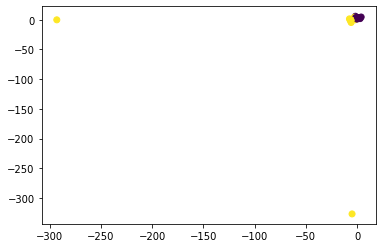

In [10]:
# matplotlibの表示に関しては以下のサイトを参照
# https://qiita.com/nkay/items/d1eb91e33b9d6469ef51#32-%E6%95%A3%E5%B8%83%E5%9B%B3axesscatter
import matplotlib.pyplot as plt
plt.scatter(X[:,0],X[:,1] ,c=y )
plt.show()

"""
memo
以下プロットした結果を確認してみると、黄色の二つの値で外れ値になっていそうな値が存在するのがわかる。
"""

In [19]:
# 欠損値の確認
np.isnan(X[:,0])# nanのところがTrueになる

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True])

In [20]:
~np.isnan(X[:,0]) # nanのところがFalseになる

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
       False,  True])

In [21]:
~np.isnan(X[:,1]) # nanのところがFalseになる

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True])

In [23]:
# 特徴量が両方ともTrueのところを取得する
~np.isnan(X[:,0])  & ~np.isnan(X[:,1])

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True, False,  True,  True,  True,
       False,  True])

In [28]:
# 欠損値を排除
X1 = X[~np.isnan(X[:,0])  & ~np.isnan(X[:,1])]
y1 = y[~np.isnan(X[:,0])  & ~np.isnan(X[:,1])]

In [31]:
print(X1.shape)
print(y1.shape)

(18, 2)
(18,)


In [37]:
# 外れ値の削除(+/−10より大きいものは排除)
X2 = X1[(abs(X1[:,0])<10) & (abs(X1[:,1])<10)]
y2 = y1[(abs(X1[:,0])<10) & (abs(X1[:,1])<10)]

In [38]:
print(X2.shape)
print(y2.shape)

(16, 2)
(16,)


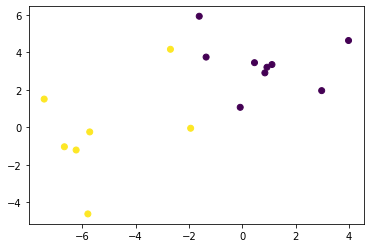

In [43]:
# 欠損値と外れ値を排除したデータを確認してみる。
plt.scatter(X2[:,0],X2[:,1] ,c=y2 )
plt.show()

## テキストデータの取り扱い

In [44]:
import urllib.request
# データのダウンロード
urllib.request.urlretrieve("http://www.gutenberg.org/files/11/11-0.txt", "allice.txt")

('allice.txt', <http.client.HTTPMessage at 0x11b321f10>)

In [45]:
with open('allice.txt', 'r', encoding='UTF-8') as f:
    print(f.read()[710:1400])

coding: UTF-8

Produced by: Arthur DiBianca and David Widger

*** START OF THE PROJECT GUTENBERG EBOOK ALICE’S ADVENTURES IN WONDERLAND ***

[Illustration]




Alice’s Adventures in Wonderland

by Lewis Carroll

THE MILLENNIUM FULCRUM EDITION 3.0

Contents

 CHAPTER I.     Down the Rabbit-Hole
 CHAPTER II.    The Pool of Tears
 CHAPTER III.   A Caucus-Race and a Long Tale
 CHAPTER IV.    The Rabbit Sends in a Little Bill
 CHAPTER V.     Advice from a Caterpillar
 CHAPTER VI.    Pig and Pepper
 CHAPTER VII.   A Mad Tea-Party
 CHAPTER VIII.  The Queen’s Croquet-Ground
 CHAPTER IX.    The Mock Turtle’s Story
 CHAPTER X.     The Lobster Quadrille
 CHAPTER XI.    Who Stole the Tarts?
 C


In [46]:
# CountVectorizerの実装
from sklearn.feature_extraction.text import CountVectorizer
txt_vec = CountVectorizer(input="filename")

In [47]:
txt_vec.fit(["allice.txt"])

CountVectorizer(input='filename')

In [52]:
txt_vec.get_feature_names()[100:120]

['_two_',
 '_un_important',
 '_very_',
 '_was_',
 '_we',
 '_what',
 '_what_',
 '_whatever',
 '_will_',
 '_with',
 '_would_',
 '_yet_',
 '_you',
 '_you_',
 '_your_',
 '_yours_',
 'abide',
 'able',
 'about',
 'above']

In [50]:
# 単語の数の確認
len(txt_vec.get_feature_names())

3122

In [54]:
# ベクトル化
allice_vec = txt_vec.transform(["allice.txt"])
# ３１２２次元のスパース行列になっている。
allice_vec 

<1x3122 sparse matrix of type '<class 'numpy.int64'>'
	with 3122 stored elements in Compressed Sparse Row format>

In [55]:
allice_vec.shape

(1, 3122)

In [62]:
for word,count in zip(txt_vec.get_feature_names()[200:220], allice_vec[0, 200:220]):
    print(word, count)

altogether   (0, 0)	5
  (0, 1)	13
  (0, 2)	16
  (0, 3)	1
  (0, 4)	12
  (0, 5)	62
  (0, 6)	1
  (0, 7)	941
  (0, 8)	2
  (0, 9)	9
  (0, 10)	5
  (0, 11)	2
  (0, 12)	4
  (0, 13)	4
  (0, 14)	1
  (0, 15)	1
  (0, 16)	22
  (0, 17)	9
  (0, 18)	4
  (0, 19)	1


In [74]:
# TF/IDFの実装
from sklearn.feature_extraction.text import TfidfVectorizer
# TfidfVectorizer
vec_tfidf = TfidfVectorizer()
sample = np.array(['Apple computer of the apple mark', 'linux computer', 'windows computer'])
X = vec_tfidf.fit_transform(sample)


In [77]:
pd.DataFrame(X.toarray(), columns=vec_tfidf.get_feature_names())

,apple,computer,linux,mark,of,the,windows
0,0.73777,0.217869,0.000000,0.368885,0.368885,0.368885,0.000000
1,0.00000,0.508542,0.861037,0.000000,0.000000,0.000000,0.000000
2,0.00000,0.508542,0.000000,0.000000,0.000000,0.000000,0.861037


## 画像データに関して

In [78]:
from sklearn.datasets import load_sample_image
china = load_sample_image("china.jpg")

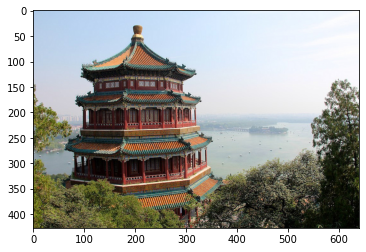

In [79]:
plt.imshow(china)

In [80]:
china.shape

(427, 640, 3)

### 特徴量の抽出に関して


In [81]:
import numpy as np
from sklearn.model_selection import ShuffleSplit
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()

X = data.data
y = data.target


ss = ShuffleSplit(n_splits=1, 
                  train_size=0.8, 
                  test_size=0.2, 
                  random_state=0)

train_index, test_index = next(ss.split(X, y))

X_train, X_test = X[train_index], X[test_index]
y_train, y_test = y[train_index], y[test_index]

In [82]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [83]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# カイ二乗検定を使用した変数選択(20個選択)
skb = SelectKBest(chi2 , k=20)

In [84]:
skb.fit(X_train , y_train)

SelectKBest(k=20, score_func=<function chi2 at 0x11b2400d0>)

In [87]:
# 20個の特徴量を取得
X_train_new = skb.transform(X_train)
print(X_train_new.shape)

(455, 20)


In [89]:
# どの特徴量が使用されたのか確認
skb.get_support()
data.feature_names[skb.get_support()]

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean compactness', 'mean concavity', 'mean concave points',
       'radius error', 'perimeter error', 'area error',
       'compactness error', 'concavity error', 'worst radius',
       'worst texture', 'worst perimeter', 'worst area',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry'], dtype='<U23')

In [91]:
# 特徴量が何個がベストなのかを実際に計算しても止めてみる。
from sklearn.model_selection import StratifiedKFold
from sklearn import linear_model
clf = linear_model.LogisticRegression(solver='liblinear')
k_range = np.arange(1, 31)
scores = []
std = []

for k in k_range:
    # 特徴量の数ごとのループ処理

    ss = StratifiedKFold(n_splits=10, 
                         shuffle=True, 
                         random_state=2)
    score = []
    for train_index, val_index in ss.split(X_train,
                                           y_train):
        # k分割交差検証のループ処理

        X_train2, X_val = X[train_index], X[val_index]
        y_train2, y_val = y[train_index], y[val_index]

        skb = SelectKBest(chi2, k=k)
        skb.fit(X_train2, y_train2)
        
        X_new_train2 = skb.transform(X_train2)
        X_new_val    = skb.transform(X_val)
        
        clf.fit(X_new_train2, y_train2)
        score.append( clf.score(X_new_val, y_val) )

    scores.append( np.array(score).mean() )
    std.append( np.array(score).std() )
    
scores = np.array(scores)
std = np.array(std)

Text(0, 0.5, 'accuracy')

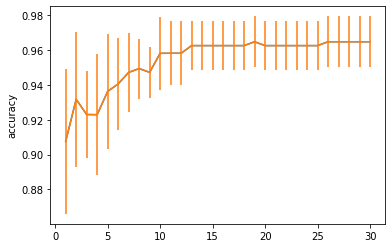

In [92]:
import matplotlib.pyplot as plt
%matplotlib inline 

plt.plot(k_range, scores)
plt.errorbar(k_range, scores, yerr=std)
plt.ylabel("accuracy")

In [95]:
# bestなスコアの変数の数
best_k = k_range[np.argmax(scores)]
print(best_k)
"""
いかにより今回は１９個の変数がベストであると判断する事ができる。
"""

19


'\nいかにより今回は１９個の変数がベストであると判断する事ができる。\n'

## 次元圧縮に関して



In [98]:
from pandas.plotting import scatter_matrix
from sklearn.decomposition import PCA


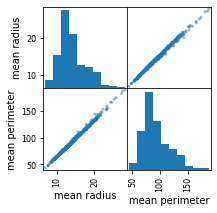

In [99]:
data = load_breast_cancer()
df = pd.DataFrame(data.data[:, [0,2]],
                  columns=data.feature_names[[0,2]])
scatter_matrix(df, figsize=(3,3));
"""
下のデータを確認すると二つの特徴量に相関がある事がわかる→次元圧縮する。
"""

In [100]:
X = data.data[:, [0,2]]
y = data.target
names = data.feature_names[[0,2]]

Text(0, 0.5, 'mean perimeter')

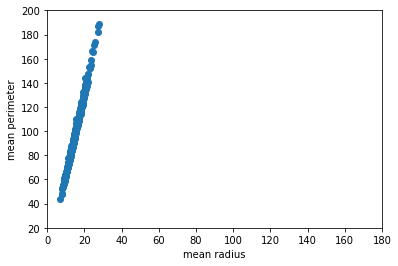

In [102]:
# 変換する前のデータ
plt.scatter(X[:, 0], X[:, 1])
plt.xlim(0, 180)
plt.ylim(20, 200)
plt.xlabel(names[0])
plt.ylabel(names[1])

In [103]:
pca = PCA()
pca.fit(X)
X_new = pca.transform(X)

(-60.0, 120.0)

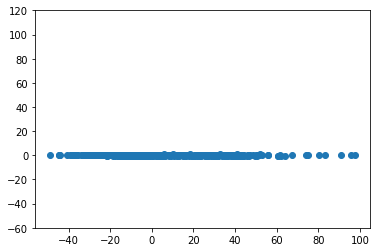

In [104]:
# 変換後のデータ
plt.scatter(X_new[:, 0], X_new[:, 1])
plt.ylim(-60, 120)

## 標準化


In [108]:
data = load_breast_cancer()
X = data.data
y = data.target

from sklearn.model_selection import ShuffleSplit

ss = ShuffleSplit(n_splits=1, 
                  train_size=0.8, 
                  test_size=0.2, 
                  random_state=0)

train_index, test_index = next(ss.split(X, y))

X_train, X_test = X[train_index], X[test_index]
y_train, y_test = y[train_index], y[test_index]

In [109]:
# 標準化を行う
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [110]:
scaler.fit(X_train)

StandardScaler()

In [111]:
# 標準化したデータに変換
X_train_scale = scaler.transform(X_train)

In [113]:
# 標準化なので平均０、分散１になっているか確認する。
print("平均値")
print(X_train_scale.mean())
print("分散")
print(X_train_scale.std())

平均値
2.9150471210670777e-17
分散
1.0
